# Generate publication figures

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns 
import os 
import matplotlib.gridspec as gridspec

In [2]:
from dotenv import load_dotenv
load_dotenv("../.env")

FIGURES = "../figures"
INPUT_FIGURES = "../data/input_figures"
TABLE = os.getenv("TABLE")
PDB_BIOCHEM = os.getenv("PDB_BIOCHEM")

In [3]:
df = pd.read_csv(TABLE)
df["Deposition date"] = pd.to_datetime(df["Deposition date"])
df_bc = pd.read_csv(PDB_BIOCHEM)

## Figure 1

In [4]:
from matplotlib.offsetbox import OffsetImage
from matplotlib.offsetbox import AnnotationBbox
from matplotlib.lines import Line2D
from matplotlib.patches import Circle
from matplotlib.patches import FancyArrowPatch
import matplotlib.patches as mpatches 
from matplotlib.collections import PatchCollection

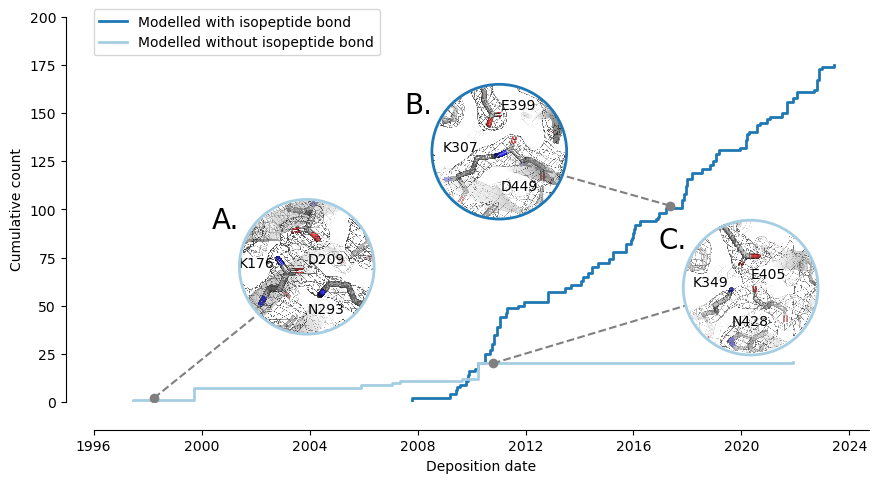

In [58]:
fig, ax = plt.subplots(figsize=[10, 5])

# 1

plot_df = df[df["Is bonded"] == True].copy()
plot_df["correct_geo_or_asgn"] = True
plot_df.loc[(plot_df["Fixed"]==True)|(plot_df["Bad rotamer"]==True), "correct_geo_or_asgn"] = False
g=sns.ecdfplot(data=plot_df, palette="Paired", 
      x="Deposition date", stat="count", hue="correct_geo_or_asgn", ax=ax, lw=2)
ax.legend(labels=["Modelled with isopeptide bond", "Modelled without isopeptide bond"], frameon=True)
sns.move_legend(g, (0, .9))
labels = [t.get_text() for t in ax.get_xticklabels()]
positions = [t.get_position()[0] for t in ax.get_xticklabels()]
ax.set_xticks(positions, labels)
ax.set_ylim([0,200])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Deposition date")
ax.set_ylabel("Cumulative count")
sns.despine(ax=ax, offset=20)

# 2 

# im 1
ax = fig.add_axes(ax.get_position(), frameon=False)  # Overlay axes with the same position
ax.set_xlim(ax.get_xlim())
ax.set_ylim(ax.get_ylim())
ax.axis("off")  # Turn off ticks and labels

arr_img = plt.imread(os.path.join(INPUT_FIGURES, "7k1u_307_399_449_cut.png"))

im = OffsetImage(arr_img, zoom=0.08)
ab = AnnotationBbox(im, xy=(.55, .65) , box_alignment=(0.5, 0.5), bboxprops=dict(edgecolor="none"))
ax.add_artist(ab)

# Line
start = (.99, .51)
end = (0.6, 0.62)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=20, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

# Annots
ax.text(x=0.3,y=.75,s="B.", fontsize=20)
ax.text(x=0.4, y=.65,s="K307")
ax.text(x=0.55,y=.55,s="D449")
ax.text(x=0.55,y=.76,s="E399")

# Add circle
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((.547,.65), .175, color=palette[1], fill=False, zorder=20, lw=2)
ax.add_patch(c1)

# im 2
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "2x9y_349_405_428_cut.png"))
im = OffsetImage(arr_img, zoom=.08)
ab = AnnotationBbox(im, xy=(1.2, .3) , box_alignment=(0.5, 0.5), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Line
start = (0.53, 0.1)
end = (1.03, 0.25)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=100, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

ax.text(x=0.96,y=.4,s="C.", fontsize=20)
ax.text(x=1.05,y=.3,s="K349")
ax.text(x=1.2,y=.32,s="E405")
ax.text(x=1.15,y=.2,s="N428")

# Add circles
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((1.2,.297), .175, color=palette[0], fill=False, zorder=1000, lw=2, clip_on=False)
ax.add_patch(c1)

# im 3 
arr_img = plt.imread(os.path.join(INPUT_FIGURES, "1amx_A_176_209_293_cut.png"))
im = OffsetImage(arr_img, zoom=.08)
ab = AnnotationBbox(im, xy=(.05, .35), box_alignment=(0.5, 0.5), bboxprops=dict(color="white"))
ax.add_artist(ab)

# Line
start = (-.35, .01)
end = (-.09, .22)
ax.plot([start[0], end[0]], [start[1], end[1]], '--', zorder=100, color="gray")
ax.plot(start[0], start[1], 'o', color="gray", alpha=1)

# Annots
ax.text(x=-.2,y=.45,s="A.", fontsize=20)
ax.text(x=-.13,y=.35,s="K176", zorder=100)
ax.text(x=.05,y=.36,s="D209", zorder=1000)
ax.text(x=.05,y=.23,s="N293", zorder=1000)

# Add circle
palette = sns.color_palette("Paired", 2)
c1 = mpl.patches.Circle((.047,.351), .175, color=palette[0], fill=False, zorder=1000, lw=2, clip_on=False)
ax.add_patch(c1)

ax.set_aspect('equal', adjustable='datalim')

plt.savefig(os.path.join(FIGURES, "f1.png"), dpi=350, bbox_inches="tight", pad_inches=0, transparent=False)

## Figure S1